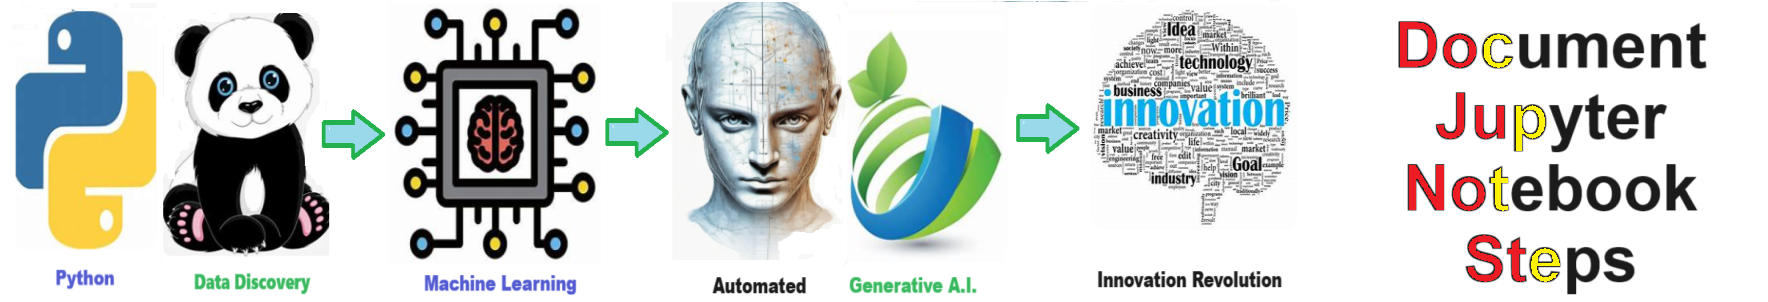

# Jupyter Notebook Process Steps

## Use this process to extract workflows and process steps form existing notebooks.

#### by Joe Eberle started on 05-23-2023 - https://github.com/JoeEberle/ - josepheberle@outlook.com

In [1]:
first_install = False 
if first_install:
    !pip install schedule
    !pip install zipp

In [1]:
import os
import schedule
from datetime import datetime
import pandas as pd 
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import time
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-03-17 at 22:14:05.996959


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [1]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'jupyter_notebook_process_steps'

## Optional Step 0 - Intitiate Logging and debugging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process solution_temple Step 0 - Initializing and starting Logging Process.


In [5]:
def present_dataframe_steps(df, term_step_number = 0 , output="print", title=None):
    if len(title) >= 3:
        print(f"## {title}") 
    for index, row in df.iterrows():
        if output=="print" or output=="printsay":
            print(f"Step {index + 1}. {row[df.columns[term_step_number]]}  ")
        if output=="speech" or output=="printsay":
            tc.say(f"Step {index + 1}. {row[df.columns[term_step_number]]}  ")          
    return  

In [1]:
import nbformat
import pandas as pd

def extract_steps_from_notebook(notebook_file):
    # Read the notebook file
    with open(notebook_file, 'r', encoding='utf-8') as f:
        notebook_content = nbformat.read(f, as_version=4)
    
    # Initialize lists to store step numbers and descriptions
    step_numbers = []
    step_descriptions = []
    steps = 0 
    # Iterate through each cell in the notebook
    for cell in notebook_content['cells']:
        # Check if the cell is a markdown cell
        if cell['cell_type'] == 'markdown':
            # Iterate through each line in the cell
            for line in cell['source'].split('\n'):
                # Check if the line contains the word "Step"
                if 'Step' in line:
                    # Extract step number and description
                    step_description = line 
                    # Append step number and description to lists
                    steps += 1
                    step_numbers.append(steps)
                    step_descriptions.append(step_description.strip())

    # Create a DataFrame from the lists
    steps_df = pd.DataFrame({'Step_Number': step_numbers, 'Step_Description': step_descriptions})
    
    return steps_df


In [2]:
note_book_file_name = r"C:\Users\josep\automating_windows_task_scheduler\automating_windows_task_scheduler.ipynb"
df_steps = extract_steps_from_notebook(note_book_file_name)
print(df_steps)

   Step_Number                                   Step_Description
0            1  ## Optional Step 0 - Intitiate Configuration S...
1            2  ## Optional Step 0 - Intitiate Logging and deb...
2            3            step 2 - Launch the task scheduler Step
3            4              ## Step 0 - Process End - display log


In [8]:
note_book_file_name = r"C:\Users\josep\term_frequency_inverse_document_frequency\term_frequency_inverse_document_frequency.ipynb"
df_steps = extract_steps_from_notebook(note_book_file_name)
present_dataframe_steps(df_steps,2,"Process Steps")

TypeError: object of type 'NoneType' has no len()

In [31]:
note_book_file_name = r"C:\Users\josep\predicting_lung_cancer\predicting_lung_cancer.ipynb"
df_steps = extract_steps_from_notebook(note_book_file_name)
print(df_steps)

    Step_Number                                   Step_Description
0             1  ## Optional Step 0 - Intitiate Configuration S...
1             2  ## Optional Step 0 - Intitiate Logging and deb...
2             3               ## Step 1  - Read in Sample Data Set
3             4       ## Step 2.1  - Data Cleansing - Label encode
4             5  ## Step 2.2  - Data Cleansing - Remove duplicates
5             6                      ## Step 3  - Examine Data Set
6             7                ## Step 4 - Examine Target Variable
7             8  ## Step 5 - Plot all independent variables rel...
8             9  ## Step 7 - Drop the columns that dont help th...
9            10                    ## Step 8 - Feature Engineering
10           11              ## Step 0 - Process End - display log


## Step 0 - Process End - display log

In [5]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-03-15 10:39:07,381 - INFO - START solution_temple =============================================
2024-03-15 10:39:07,381 - INFO - START solution_temple Start Time = 2024-03-15 10:39:07
2024-03-15 10:39:07,381 - INFO - solution_temple Step 0 - Initialize the configuration file parser
2024-03-15 10:39:07,382 - INFO - Process solution_temple Step 0 - Initializing and starting Logging Process.
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple The total process duration was:0.01
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Stop Time = 2024-03-15 10:39:07
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Short process duration less than 3 Seconds:0.01
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Performance optimization is not reccomended
2024-03-15 10:39:07,391 - INFO - END solution_temple =============================================



#### https://github.com/JoeEberle/ -- josepheberle@outlook.com